In [1]:
from quizz import *

## Quizz

In [2]:
display(Q1)

Fałsz!

Programy związane z blokującymi operacjami I/O spędzają większość czasu, czekając na zakończenie operacji zewnętrznych. Programy powiązane z procesorem spędzają większość czasu na obliczeniach.

In [3]:
display(Q2)

Programy związane z CPU spedzają większość czasu na obliczeniach. Multiprocessing pozwala podzielić oblczenia na różne CPU. Inne formy współbiezności w Pythonie działają na jednyn CPU

In [4]:
display(Q3)

Jeśli twój program jest związany z procesorem, uruchomienie jednego procesu na każdym procesorze prawdopodobnie przyniesie dobre wyniki. Jeśli użyjesz mniejszej liczby procesów i procesory będą bezczynne. Uruchomienie większej liczby procesów spowoduje, że co najmniej jeden z procesorów będzie musiał zamienić procesy wejściowe i wyjściowe, co zabiera czas potrzebny na przetwarzanie.

In [5]:
display(Q4)

In [6]:
display(Q5)

Niektóre programy poświęcają więcej czasu na konfigurowanie i zarządzanie współbieżnością niż na wykonywanie operacji równoległych.

In [7]:
display(Q6)

Współbieżność „robi rzeczy w tym samym czasie”. W Pythonie odpowiada za to biblioteka `multiprocessing` - ugólniajać można napisać, zę uruchamia ona różne interpretery Pythona na różnych procesorach. 
W `asyncio` i wątkach (`threads`) Python wspóbieżność realizowana jest poprzez wykorzystywanie czasu procesora, który wykonując pewną pracę nad innym zadaniem, czeka na odpowiedź z wolnego interfejsu.

In [ ]:
display(Q7)

Biblioteka `asyncio` działa na pojedynczym procesorze w jednym interpreterze Pythona. Możliwe jest połączenie `asyncio` z wieloprocesorem, aby wykorzystać wiele procesorów do pracy nad problemem, ale jest to bardziej zaawansowane użycie. 

Współbieżność może być trudna do prawidłowej implementacji i może spowodować, że program będzie trudniejszy do odczytania i utrzymania. Prawdopodobnie poświęcisz więcej czasu na dodawanie współbieżności do tego programu, niż kiedykolwiek zaoszczędzisz.

Jeśli program jest związany z procesorem, uruchomienie jednego procesu na każdym procesorze prawdopodobnie przyniesie dobre wyniki. Jeśli użyjesz mniejszej liczby procesów i procesory będą bezczynne. Podczas gdy korzystasz z większej liczby procesów, co najmniej jeden z procesorów będzie musiał zamienić procesy wejściowe i wyjściowe, co zabiera czas potrzebny na przetwarzanie.

## Współbieżność (Concurrency)

Według słownika termin ten **oznacza pewną właściwość zbioru procesów, które są wykonywane w tym samym czasie.**

W Pythonie takie procesy, które są wykonywane współbieżnie nazywamy:

- wątkami (`thread`)
- procesami (`process`)
- zadaniami (`task`) 

Na pewnym poziomie można jednak o nich wszystkich myśleć jako o **sekwencji instrukcji wykonywanych w pewnym porządku**.

Sekwencje te mogą one być wstrzymane w określonych punktach a procesor, który je przetwarzał może przełączyć się wtedy na inny proces. Stan każdego z nich jest zapisywany i można go potem wznowić w miejscu, w którym został wstrzymany. 

Pomimo ogólnych podobieństw wątki, procesy i zadania różnią się znacznie sposobem realizacji współbieżności.

Gdybyśmy chcieli być bardzo precyzyjni, to doszliśmy do wniosku, że jedynie wieloprocesowość faktycznie prowadzi do współbieżności. Procesy te bowiem są wykonywane przez oddzielne procesory (lub tzw. rdzenie w procesorach wielordzeniowych).
Podejście oparte o asynchroniczność (`tasks`) i wątki (`threads`) operują na **jednym procesorze na raz**. Wykorzystują sprytne mechanizmy umożliwiajace przełączenie procesów w odpowiednim momencie. Takie  podejście nadal nazywane jest jednak współbieżnością.

W przypadku **wątków** (`Threads`) system operacyjny wie o każdym wątku i **może go przerwać w dowolnym momencie**, aby uruchomić inny wątek. Nazywane jest to **wielozadaniowością zapobiegawczą** (pre-emptive mutlitasking), ponieważ system może uprzedzić wątek w celu dokonania przełączenia. 
W podejściu tym kod w wątku nie musi nic robić by dokonać zmiany. Z drugiej jednak strony przełączenie może zdarzyć się nawet w środku tak prostych operacji jak dodawanie. 

Podejscie **asynchroniczne** wykorzystuje natomiast tzw. **wielozadaniowość kooperacyjną** (cooperative multitasking). W podejściu tym zadania współpracują ze sobą poprzez ogłaszanie, kiedy są gotowe do wyłączenia i trzeba to uwzględnić w kodzie. 
Zaletą tego podejścia jest to, że wiadomo w którym miejscu zadanie jest przełączone. 

**Wątki i zadania dotyczą współbieżności na jednym procesorze, na jednym rdzeniu**. Współczesne komputery mają jednak procesory wielordzeniowe. By wykorzystać tę moc stosuje się wieloprocesowość (**multiprocessing**). Python tworzy nowe procesy, które są wykonywane na osobnych rdzeniach procesora. Dzięki temu mogą rzeczywiście być **wykonywane w tym samym czasie**.


### porównanie 

| Typ współbieżności | Moduł | Opis | Liczba procesorów / rdzeni |
|--------------------|-------|------|----------------------------|
| wielozadaniowością zapobiegawczą (pre-emptive mutlitasking) | threading | System operacyjny decyduje kiedy przełączyć zadania | 1 |
| wielozadaniowość kooperacyjna (cooperative multitasking) | asyncio | Zadanie decyduje, kiedy oddać kontrolę | 1 |
| wieloprocesowość | multiprocessing | Procesy są wykonywane w tym samym czasie na osobnych rdzeniach/ procesorach | Wiele | 

### Zastosowanie

Zastosowanie współbieżności jest istotne szczególnie dla dwóch rodzajów problemów. 

Nazwiemy je: **CPU-bound** (związane z procesorem) i **I/O-bound** (wiązane z operacjami wejścia wyjścia)

Problemy związane z I/O powodują często spowolnienie działania programu ponieważ musi on czekać na wejście/wyjście z jakiegoś zewnętrznego zasobu (plik, baza danych, API). Tego typu spowolnienia spowodowane są tym, że **zasoby te są znacznie wolniejsze niż procesor**. Najczęściej chodzi tu o system plików oraz połączenia sieciowe.

Może wyglądać to jak na poniższym diagramie. Krótkie czasy pracy procesora przerywane są dłuższymi odcinkami konsumowanymi przez operacje I/O. A to właśnie czas pracy procesora jest tym czasem, w którym nasz program wykonuje pracę. W rzeczywistości odcinki oczekiwania są znacznie dłuższe.

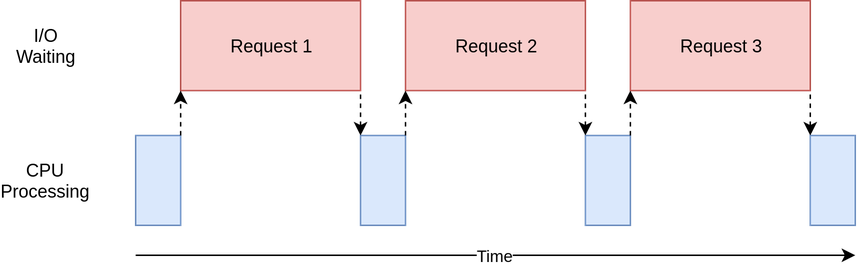

Z drugiej strony, niektóre programy wykonują oblczenia bez sięgania po zasoby sieciowe czy pliki. 
Tego tupu programy określamy jako CPU-bound. W tym przypadku zasobem ograniczającym szybkość programu jest CPU. W tym przypadku diagram analogiczny do powyższego mógłby wyglądać w ten sposób:

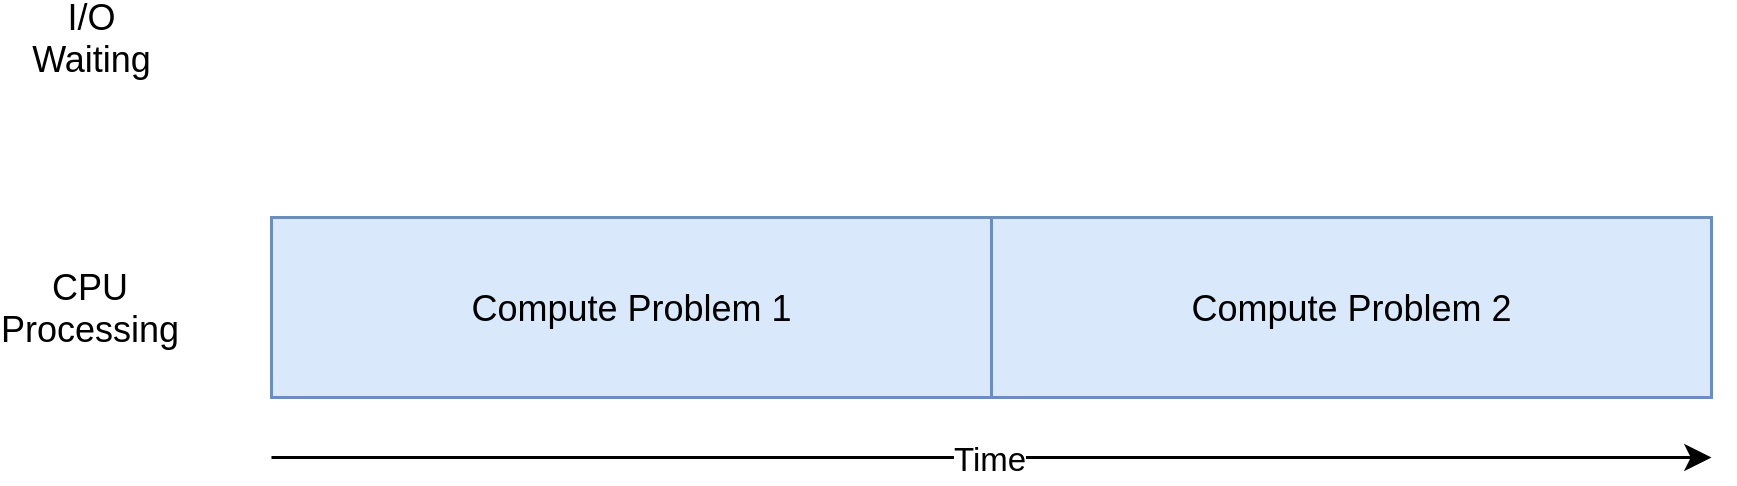

W zależności od rodzaju problemu lepiej lub gorzej sprawdzają się różne rodzaje współbieżności. Dodanie współbieżności do kodu może go skomplikować, utrudnić czytanie i zrozumienie, dlatego warto rozważyć dokładnie czy, kiedy i jaki rodzaj współbieżności zastosować.

| I/O-bound | CPU-bound | 
|-----------|-----------|
| Program spędza większość czasu komunikując się z wolnym urządzeniem - połączeniem sieciowym, twardym dyskiem, drukarką | Program spędza większość czasu na operacjach wykorzystujących CPU | 
| Przyspieszenie polega na wykorzystaniu czasu przeznaczonego na czekaniu na te urządzenia na inne rzeczy | Przyspieszczenie polega na znalezieniu sposóbów na wykonanie większej liczby obliczeń w tym samym czasie |   

## Przyspieszenie w programach typu I/O-bound

Rozważmy problem polegający na pobraniu treści poprzez sieć. Może to być np. ściągniecie kilku stron internetowych, lub jakikolwiek inny ruch sieciowy

### wersja synchroniczna:

Zaczniemy od zwykłej, niewspółbieżnej wersji programu. Skorzystamy z biblioteki `requests`. Skorzystamy też tam z **sesji** zamiast zwykłego get, by trochę przyspieszyć i zoptymalizować działanie kodu. Dużą zaletą takiego kodu jest jego **czytelność i prostota**. Jeśli taki program jest uruchamiany rzadko i zajmuje stosunkowo mało czasu - rzędu kilku sekund, to nie ma specjalnego sensu implementować tutaj współbieżności. 

Zadanie - spróbuj napisać wersję synchroniczną zadania, które polegać będzie na tym, że:
- do funkcji `download_all_sites` przekażemy listę stron internetowych
- Każda ze stron zostanie przeczytana i po przeczytaniu zostanie wypisana długosć contentu
- Po pobraniu wszystkich stron wyświetlone zostanie podsumowanie informujące o tym ile strone zostało ściągniętych i ile to zajęło, np:

    ```
    sites = [
        'https://www.python.org',
        'http://olympus.realpython.org/dice',
        ...
    ] 
    
    ...
    
    Read 48762 from https://www.python.org
    Read 276 from http://olympus.realpython.org/dice
    Downloaded 4 in 0.649165153503418 seconds
    ```
    

In [8]:
import requests
import time

def download_site(url, session):
    with session.get(url) as response:
        print(f"Read {len(response.content)} from {url}")
        
def download_all_sites(sites):
    with requests.Session() as session:
        for url in sites:
            download_site(url, session)
            
sites = [
    'https://www.python.org',
    'http://olympus.realpython.org/dice'
] 
start_time = time.time()
download_all_sites(sites)
duration = time.time() - start_time
print(f"Downloaded {len(sites)} in {duration} seconds")

Read 48762 from https://www.python.org
Read 276 from http://olympus.realpython.org/dice
Downloaded 2 in 0.649165153503418 seconds


Jeśli program używany jest jednak często, lub jeśli jego wykonanie trwa na tyle długo, że staje się to problemem, to trzeba coś z tym zrobić.

### Threading

W pierwszym podejściu skorzystamy z wątków:


In [9]:
import concurrent.futures
import requests
import threading
import time

thread_local = threading.local()

def get_session():
    if not hasattr(thread_local, "session"):
        thread_local.session = requests.Session()
    return thread_local.session

def download_site(url):
    session = get_session()
    with session.get(url) as response:
        print(f"Read {len(response.content)} from {url}")
        
def download_all_sites(sites):
    """
    ThreadPoolExecutor = Thread + Pool + Executor
    Thread - sekwencja komend
    Pool - pula wątków, z których każdy może działąć jednocześnie
    Executor - kontroluje jak i kiedy każdy z wątków z puli będzie działał
    W tym przypadku jest to kontekst manager, który pozwala utworzyć i zwolnić pulę wątków
    """
    
    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        executor.map(download_site, sites)  # metoda map zapewnia uruchomienie funkcji na każdym elemencie listy

sites = [
    'https://www.python.org',
    'http://olympus.realpython.org/dice'
] * 80
start_time = time.time()
download_all_sites(sites)
duration = time.time() - start_time
print(f"Downloaded {len(sites)} in {duration} seconds")     

Read 48762 from https://www.python.org
Read 48762 from https://www.python.org
Read 48762 from https://www.python.org
Read 276 from http://olympus.realpython.org/diceRead 48762 from https://www.python.org
Read 276 from http://olympus.realpython.org/dice

Read 48762 from https://www.python.org
Read 276 from http://olympus.realpython.org/dice
Read 276 from http://olympus.realpython.org/dice
Read 276 from http://olympus.realpython.org/diceRead 48762 from https://www.python.org

Read 48762 from https://www.python.org
Read 276 from http://olympus.realpython.org/dice
Read 48762 from https://www.python.org
Read 48762 from https://www.python.org
Read 48762 from https://www.python.org
Read 276 from http://olympus.realpython.org/dice
Read 276 from http://olympus.realpython.org/dice
Read 48762 from https://www.python.org
Read 48762 from https://www.python.org
Read 276 from http://olympus.realpython.org/dice
Read 48762 from https://www.python.org
Read 276 from http://olympus.realpython.org/dice
Rea

### Asyncio

#### Ogólna koncepcja

Ogólna koncepcja Asyncio polega na tym, że pewien pojedyńczy obiekt, zwany pętlą zdarzeń (`event loop`) kontroluje jak i kiedy uruchamiane są zadania - tzw. taski. 
Pętla zdarzeń wie w jakim każdy task jest stanie. Takich stanów może być wiele, ale dla uproszczenia przyjmijmy uproszczoną wersję, w które są tylko dwa stany.

- stan gotowości wskaże, że zadanie ma pracę do wykonania i jest gotowe do uruchomienia.
- stan oczekiwania oznacza, ze zadanie czeka na zakończenie pewnych czynności zewnętrznych - np operacji sieciowej

Uproszczona pętla zdarzeń otrzymuje dwie listy zadań, listy odpowiadają stanom.
Wybiera ona jedno z gotowych do uruchomienia zadań i przywraca je do działania. 
Te zadanie jest w pełni kontrolowane dopóki nie przekaże kontroli z powrotem do pętli zdarzeń.
Gdy to sie stanie pętla umieszcza te zadanie na liście gotowych lub oczekujących, a następnie przechodzi 
przez każde z zadań na liście oczekujących, aby sprawdzić, czy zostało ono przygotowane - np przez zakończenie operacji I/O. Jednocześnie wie, ze zadania z gotowej listy są nadal gotowe do uruchomienia.

Gdy wszystkie zadania zostaną ponownie posortowane na właściwej liście, pętla zdarzeń wybiera następne zadanie do uruchomienia i proces się powtarza. Uproszczona pętla zdarzeń wybiera najdłużej czekające zadanie i uruchamia je. Ten proces powtarza się, aż do zakończenia pętli zdarzeń.

Ważną kwestią asyncio jest to, że zadania nigdy nie rezygnują z kontroli bez świadomego działania. Nigdy nie zostają przerwane w trakcie operacji. To pozwala nam współdzielić zasoby nieco łatwiej w asyncio niż w wątkach. Nie musisz się martwić, że Twój kod będzie bezpieczny dla wątków.

#### korutyny oraz `async` i `await`

Korutyna - współprogram A (w naszym przypadku funkcja), która posiada możliwość zawieszenia wykonywania i przeniesienie wykonywania do innego współprogramu B (innej funkcji). Praca współprogramu A może zostać wznowiona w miejscu w którym została zawieszona.

W Asyncio mamy dwa słowa kluczowe `async` i `await`. Od Pythona 3.4 dostępne są one w języku.  

`await` - określa punkty wstrzymania i wznowienia. W ten sposób można uruchamiać korutyny - ale można to zrobić tylko wewnątrz pętli zdarzeń

`async` - określa definicję korutyny. Funkcje zdefiniowane przy pomocy async podczas wywołania nie rozpoczynają wykonania swojego kodu, a zwracają specjalny obiekty korutyny. Korutyna nie robi nic, póki jej wykonanie nie zostanie zgłoszone do schedulera. A zgłasza się ją słowem await


In [22]:
# %%writefile async_example_wrong.py
import asyncio

# taka funkcja nazywana jest korutyną
async def say(what, when):
    await asyncio.sleep(when)
    print(what)

await say('hello', 1)
# #loop = asyncio.get_event_loop()
#loop = asyncio.get_running_loop()
#loop.run_until_complete(say('hello world', 1))
#loop.close()



Writing async_example_wrong.py


W powyższym przykładzie zdefiniowaliśmy prostą korutynę 

a następnie uruchomiliśmy wykorzystując wyrażenie await.
Jest to bardzo wyjątkowa sytuacja. Normalnie powinniśmy stworzyć pętlę i wywołać dla niej odpowiednią metodę - jak w zakomentowanym fragmencie. Tutaj zadziałało to dlatego, że sam Jupyter ma taką pętlę. I to co się dzieje w Jupyter jest z nią powiązane. Nie możemy też w Jupyterze utworzyć nowej pętli,  bo w jednym wątku może istnieć tylko jedna petla zdarzeń. Uruchomienie powyższego kodu poza Jupytere da nam błąd:


In [24]:
!python async_example_wrong.py

  File "async_example_wrong.py", line 8
    await say('hello', 1)
    ^
SyntaxError: 'await' outside function


In [26]:
# %%writefile async_example.py
import asyncio

async def say(what, when):
    await asyncio.sleep(when)
    print(what)

loop = asyncio.get_event_loop()
loop.run_until_complete(say('hello world', 1))
loop.close()


RuntimeError: This event loop is already running

hello world


In [27]:
!python async_example.py

hello world


Podobne przykłady można znaleźć np tutaj: https://asyncio.readthedocs.io/en/latest/hello_world.html.

Teraz wróćmy do naszego przykładu. Użyjemy tu `aiohttp`. Trzeba będzie je wcześniej zainstalować.

Ta wersja jest już bardziej skomplikowana.

Z `download_site` zrobiliśmy korutynę. Oznaczyliśmy też gdzie ma być punkt wstrzymania/wznowienia

Więcej zmian jest w `download_all_sites` - dzielimy tutaj sesję pomiędzy taskami. Możemy tak zrobić, bo działają one wszystkie w jednym wątku
W środku managera używamy metody 'asyncio.ensure_future()' - dba ona o to by taski startowały
Dla każdej strony tworzony jest osobny task. Jest to znacznie mniej kosztowne niż w przypadky wątków, więc można sobie na to pozwolić.

In [38]:
asyncio.gather?

In [41]:
asyncio.ensure_future?

In [34]:
%%writefile "asyncio_example.py"

import asyncio
import time
import aiohttp


async def download_site(session, url):
    async with session.get(url) as response:
        print("Read {0} from {1}".format(response.content_length, url))


async def download_all_sites(sites):
    async with aiohttp.ClientSession() as session:
        tasks = []
        for url in sites:
            task = asyncio.ensure_future(download_site(session, url))  # taski startują
            tasks.append(task)
        await asyncio.gather(*tasks, return_exceptions=True) # trzyma kontekst sesji
                                                             # zbieramy taski i czekamy aż wszystkie się wykonaja
 

sites = [
    'https://www.python.org',
    'http://olympus.realpython.org/dice'
] * 80
start_time = time.time()
#await download_all_sites(sites)
asyncio.run(download_all_sites(sites)) # w ten sposób trzeba to zrobić poza Jupyter, ponieważ Jupyter ma swoją
                                       # własną pętlę (event loop)
                                       # w wątku może być tylko jedna pętla
duration = time.time() - start_time
print(f"Downloaded {len(sites)} sites in {duration} seconds")

Overwriting asyncio_example.py


In [35]:
!python asyncio_example.py

Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://w

In [36]:

import asyncio
import time
import aiohttp


async def download_site(session, url):
    async with session.get(url) as response:
        print("Read {0} from {1}".format(response.content_length, url))


async def download_all_sites(sites):
    async with aiohttp.ClientSession() as session:
        tasks = []
        for url in sites:
            task = asyncio.ensure_future(download_site(session, url))
            tasks.append(task)
        await asyncio.gather(*tasks, return_exceptions=True)


sites = [
    'https://www.python.org',
    'http://olympus.realpython.org/dice'
] * 80
start_time = time.time()
await download_all_sites(sites)
# asyncio.run(download_all_sites(sites)) # w ten sposób trzeba to zrobić poza Jupyter, ponieważ Jupyter ma swoją
#                                        # własną pętlę (event loop)
#                                        # w wątku może być tylko jedna pętla
duration = time.time() - start_time
print(f"Downloaded {len(sites)} sites in {duration} seconds")

Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 276 from http://olympus.realpython.org/dice
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from https://www.python.org
Read 48853 from

### multiprocessing

Do tej pory kod uruchomiany był tylko na jedym CPU. Wynika to z ograniczeń narzucanych przez GIL - global interpreter lock. Jest to zabezpieczenie, które pozwala na to by tylko jeden wątek miał w danym czasie kontrole nad interpreterem pythona.

By uruchomic kod na wielu procesorach potrzebujemy biblioteki `multiprocessing`. Można powiedzieć, ze uruchamia ona wiele interpreterów - np po jednym dla procesora i w związku z tym w pewien sposób niweluje ograniczenia GIL

Diagram, który rysowaliśmy wcześniej tym razem mógłby wyglądac tak, że zadania dzielone sa na wiele procesorów

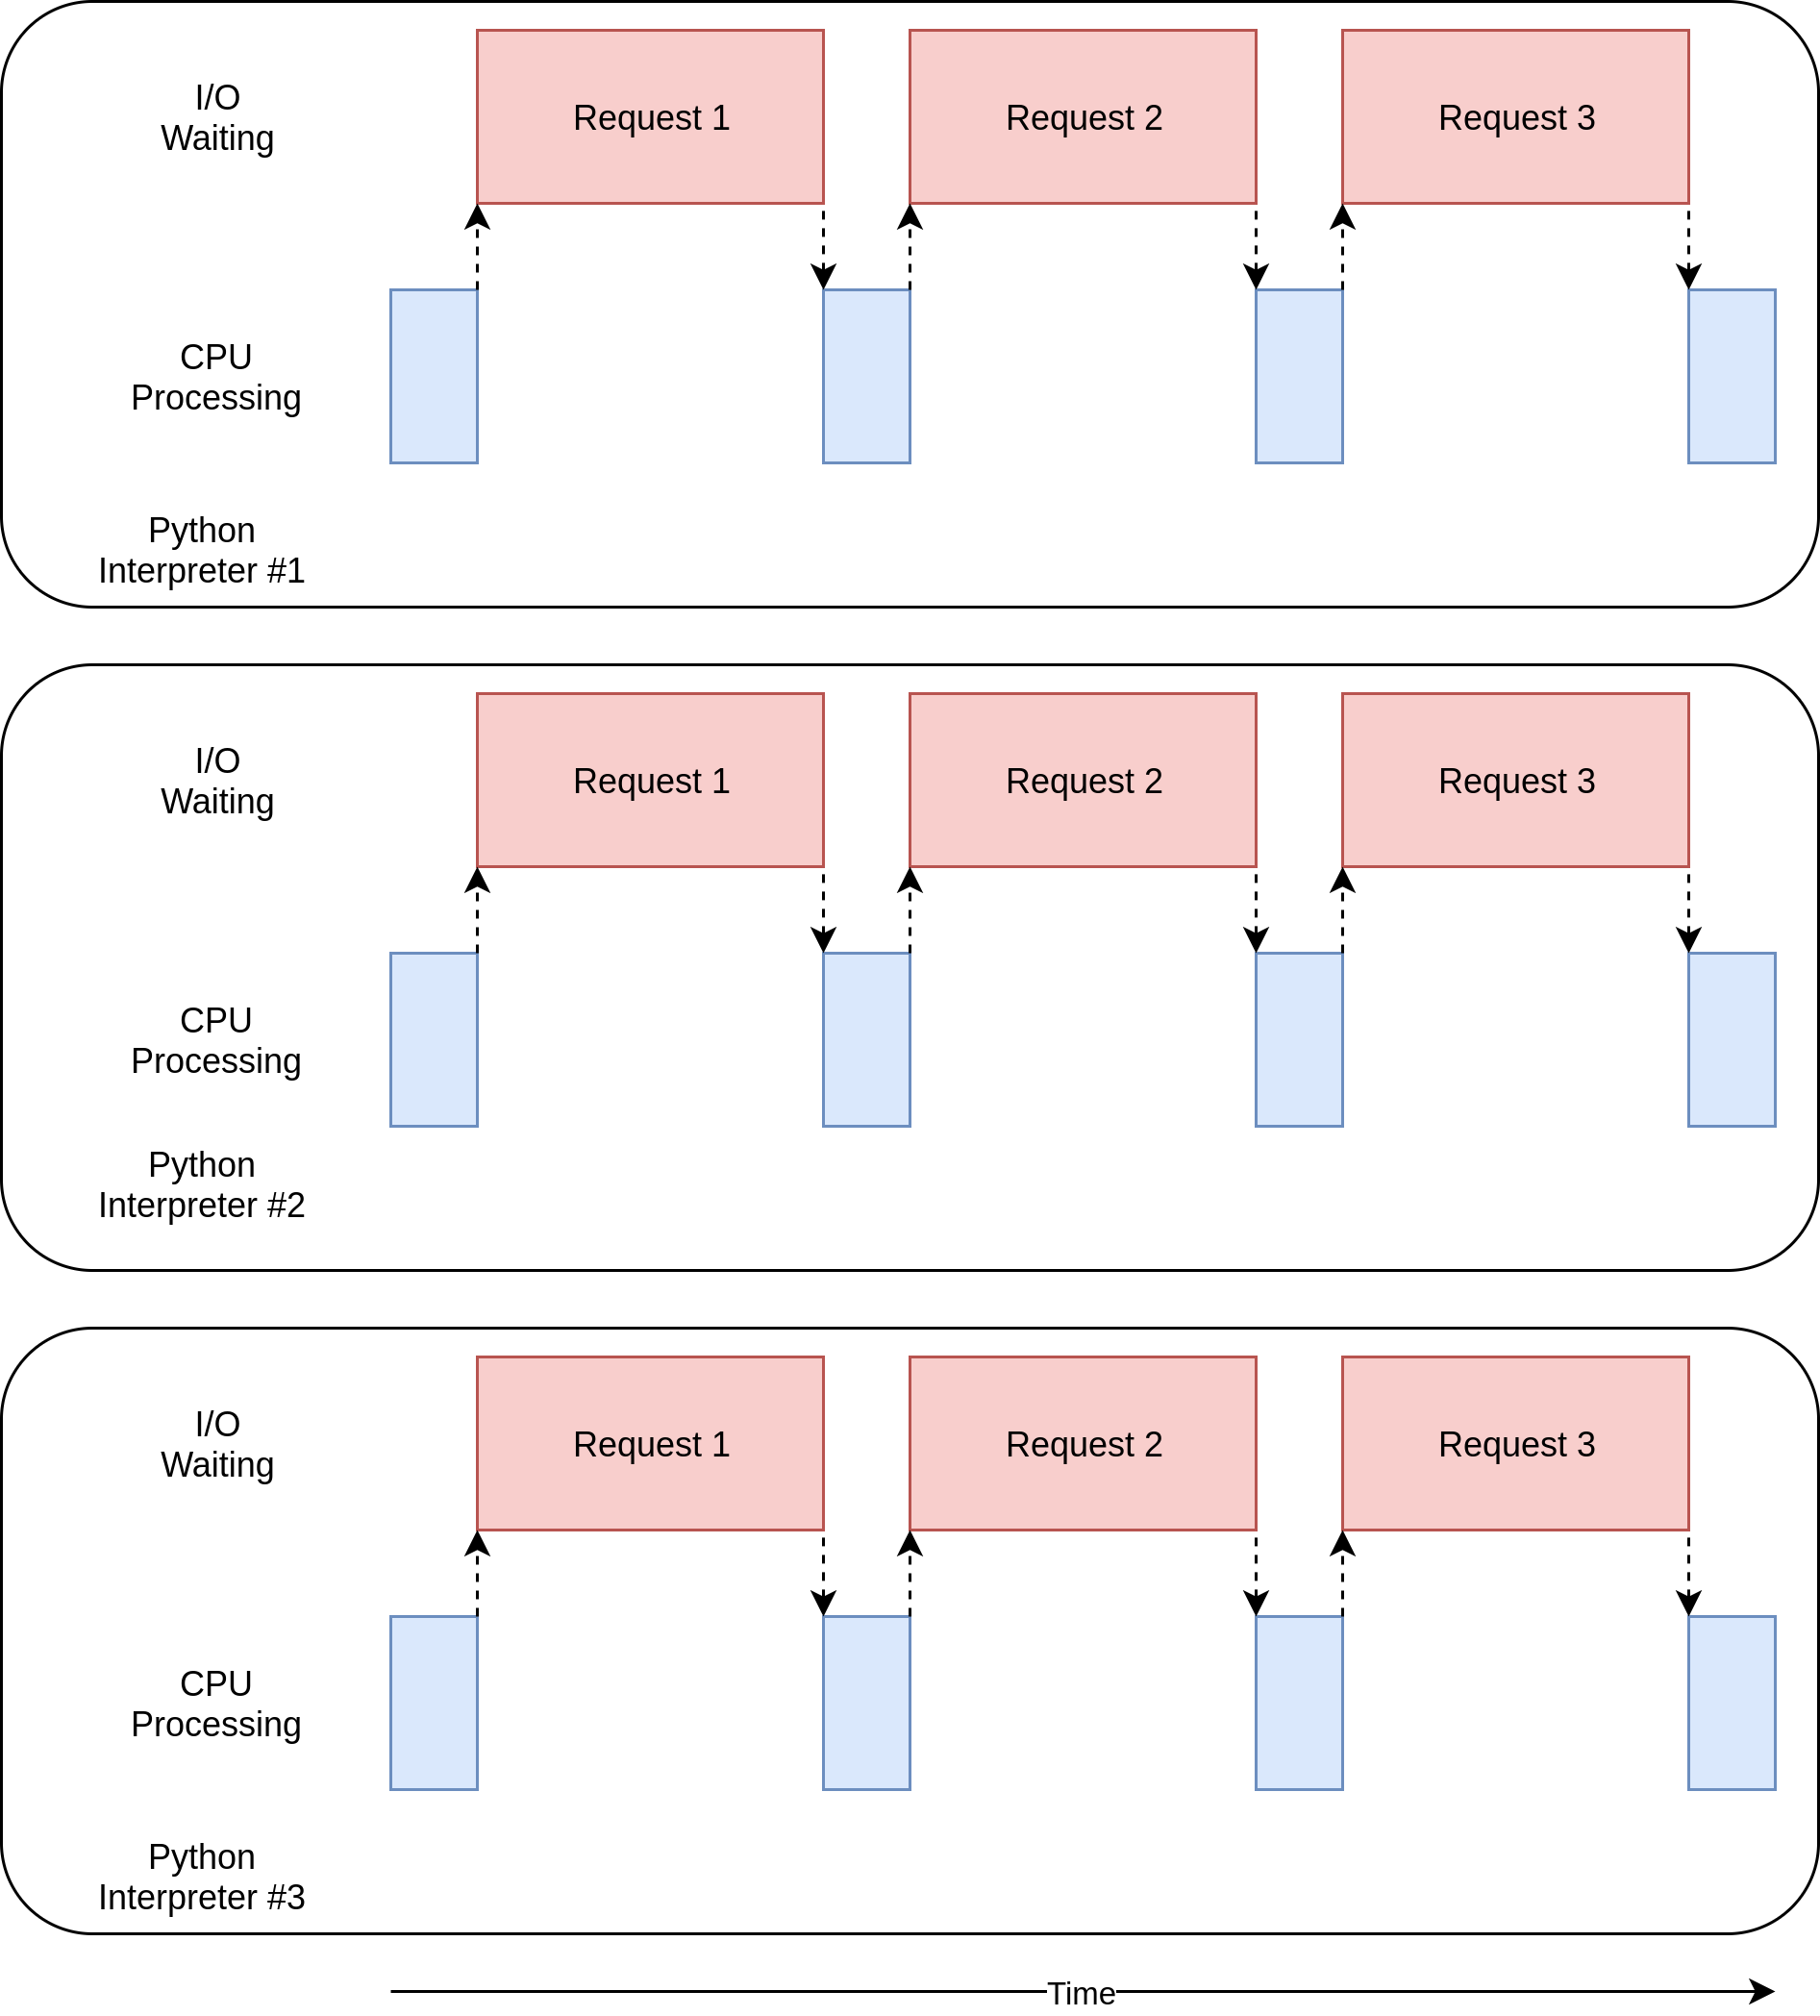

Zastosowanie takiej wpsółbieżności w tym konkretnym zadaniu nie sprawdzi się za dobrze. 
Co innego w przypadku problemów z grupy CPU-bound.

Dodatkowo warto tu zauważyć, że kod się trochę zaciemnia - np poprzez tworzenie globalnego obiektu sesji.

In [42]:
import requests
import multiprocessing
import time

session = None


def set_global_session():
    global session
    if not session:
        session = requests.Session()


def download_site(url):
    with session.get(url) as response:
        name = multiprocessing.current_process().name
        print(f"{name}:Read {len(response.content)} from {url}")


def download_all_sites(sites):
    with multiprocessing.Pool(initializer=set_global_session) as pool:
        pool.map(download_site, sites)


if __name__ == "__main__":
    sites = [
        "https://www.jython.org",
        "http://olympus.realpython.org/dice",
    ] * 80
    start_time = time.time()
    download_all_sites(sites)
    duration = time.time() - start_time
    print(f"Downloaded {len(sites)} in {duration} seconds")

ForkPoolWorker-4:Read 10286 from https://www.jython.org
ForkPoolWorker-3:Read 10286 from https://www.jython.org
ForkPoolWorker-1:Read 10286 from https://www.jython.org
ForkPoolWorker-2:Read 10286 from https://www.jython.org
ForkPoolWorker-3:Read 276 from http://olympus.realpython.org/dice
ForkPoolWorker-2:Read 276 from http://olympus.realpython.org/dice
ForkPoolWorker-1:Read 276 from http://olympus.realpython.org/dice
ForkPoolWorker-4:Read 276 from http://olympus.realpython.org/dice
ForkPoolWorker-3:Read 10286 from https://www.jython.org
ForkPoolWorker-2:Read 10286 from https://www.jython.org
ForkPoolWorker-1:Read 10286 from https://www.jython.org
ForkPoolWorker-4:Read 10286 from https://www.jython.org
ForkPoolWorker-3:Read 276 from http://olympus.realpython.org/dice
ForkPoolWorker-2:Read 276 from http://olympus.realpython.org/dice
ForkPoolWorker-1:Read 276 from http://olympus.realpython.org/dice
ForkPoolWorker-4:Read 276 from http://olympus.realpython.org/dice
ForkPoolWorker-3:Read 10

ForkPoolWorker-1:Read 10286 from https://www.jython.org
ForkPoolWorker-4:Read 276 from http://olympus.realpython.org/dice
ForkPoolWorker-4:Read 10286 from https://www.jython.org
ForkPoolWorker-2:Read 276 from http://olympus.realpython.org/dice
ForkPoolWorker-3:Read 276 from http://olympus.realpython.org/dice
ForkPoolWorker-1:Read 276 from http://olympus.realpython.org/dice
ForkPoolWorker-3:Read 10286 from https://www.jython.org
ForkPoolWorker-2:Read 10286 from https://www.jython.org
ForkPoolWorker-1:Read 10286 from https://www.jython.org
ForkPoolWorker-4:Read 276 from http://olympus.realpython.org/dice
ForkPoolWorker-2:Read 276 from http://olympus.realpython.org/dice
ForkPoolWorker-4:Read 10286 from https://www.jython.org
ForkPoolWorker-3:Read 276 from http://olympus.realpython.org/dice
ForkPoolWorker-1:Read 276 from http://olympus.realpython.org/dice
ForkPoolWorker-2:Read 10286 from https://www.jython.org
ForkPoolWorker-3:Read 10286 from https://www.jython.org
ForkPoolWorker-1:Read 10

Zobaczmy jak się sprawdzi więc multiprocessing w zadaniach typu CPU-bound. Na początek wersja synchroniczna:

In [43]:
import time


def cpu_bound(number):
    return sum(i * i for i in range(number))


def find_sums(numbers):
    for number in numbers:
        cpu_bound(number)



numbers = [5_000_000 + x for x in range(20)]

start_time = time.time()
find_sums(numbers)
duration = time.time() - start_time
print(f"Duration {duration} seconds")


Duration 9.246992111206055 seconds


Próbu optymalizacji tego kodu przy pomocy Threading, czy asyncio zakończyłyby się niepowodzeniem. Czase nie zmieniłby się, a wręcz mógłby wzrosnąć - ze wzglęu na tworzenie wątków, czy tasków. Przypomnimy sobie wykresy by to sobie uświadomić...

Prześledźmy to na prostszym przykładzie:

In [68]:
import time
import random
import threading
from itertools import islice

def chunk(it, size):
    it = iter(it)
    return iter(lambda: tuple(islice(it, size)), ())


data = [random.randint(1, 100) for i in range(1_000_000)]

chunks = list(chunk(data, 250000))


In [69]:
%%timeit -n10
results = []

def compute(data):
    results.append(sum(data))
    
workers = [threading.Thread(target=compute, args=[x,]) for x in chunks]

for worker in workers:
    worker.start()

for worker in workers:
    worker.join()

res = sum(results)
res

7.37 ms ± 433 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [70]:
%%timeit -n10 
res = sum(data)
res

5.26 ms ± 494 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Natomiast jak ten bieżący problem mógłby wyglądac na wykresie?

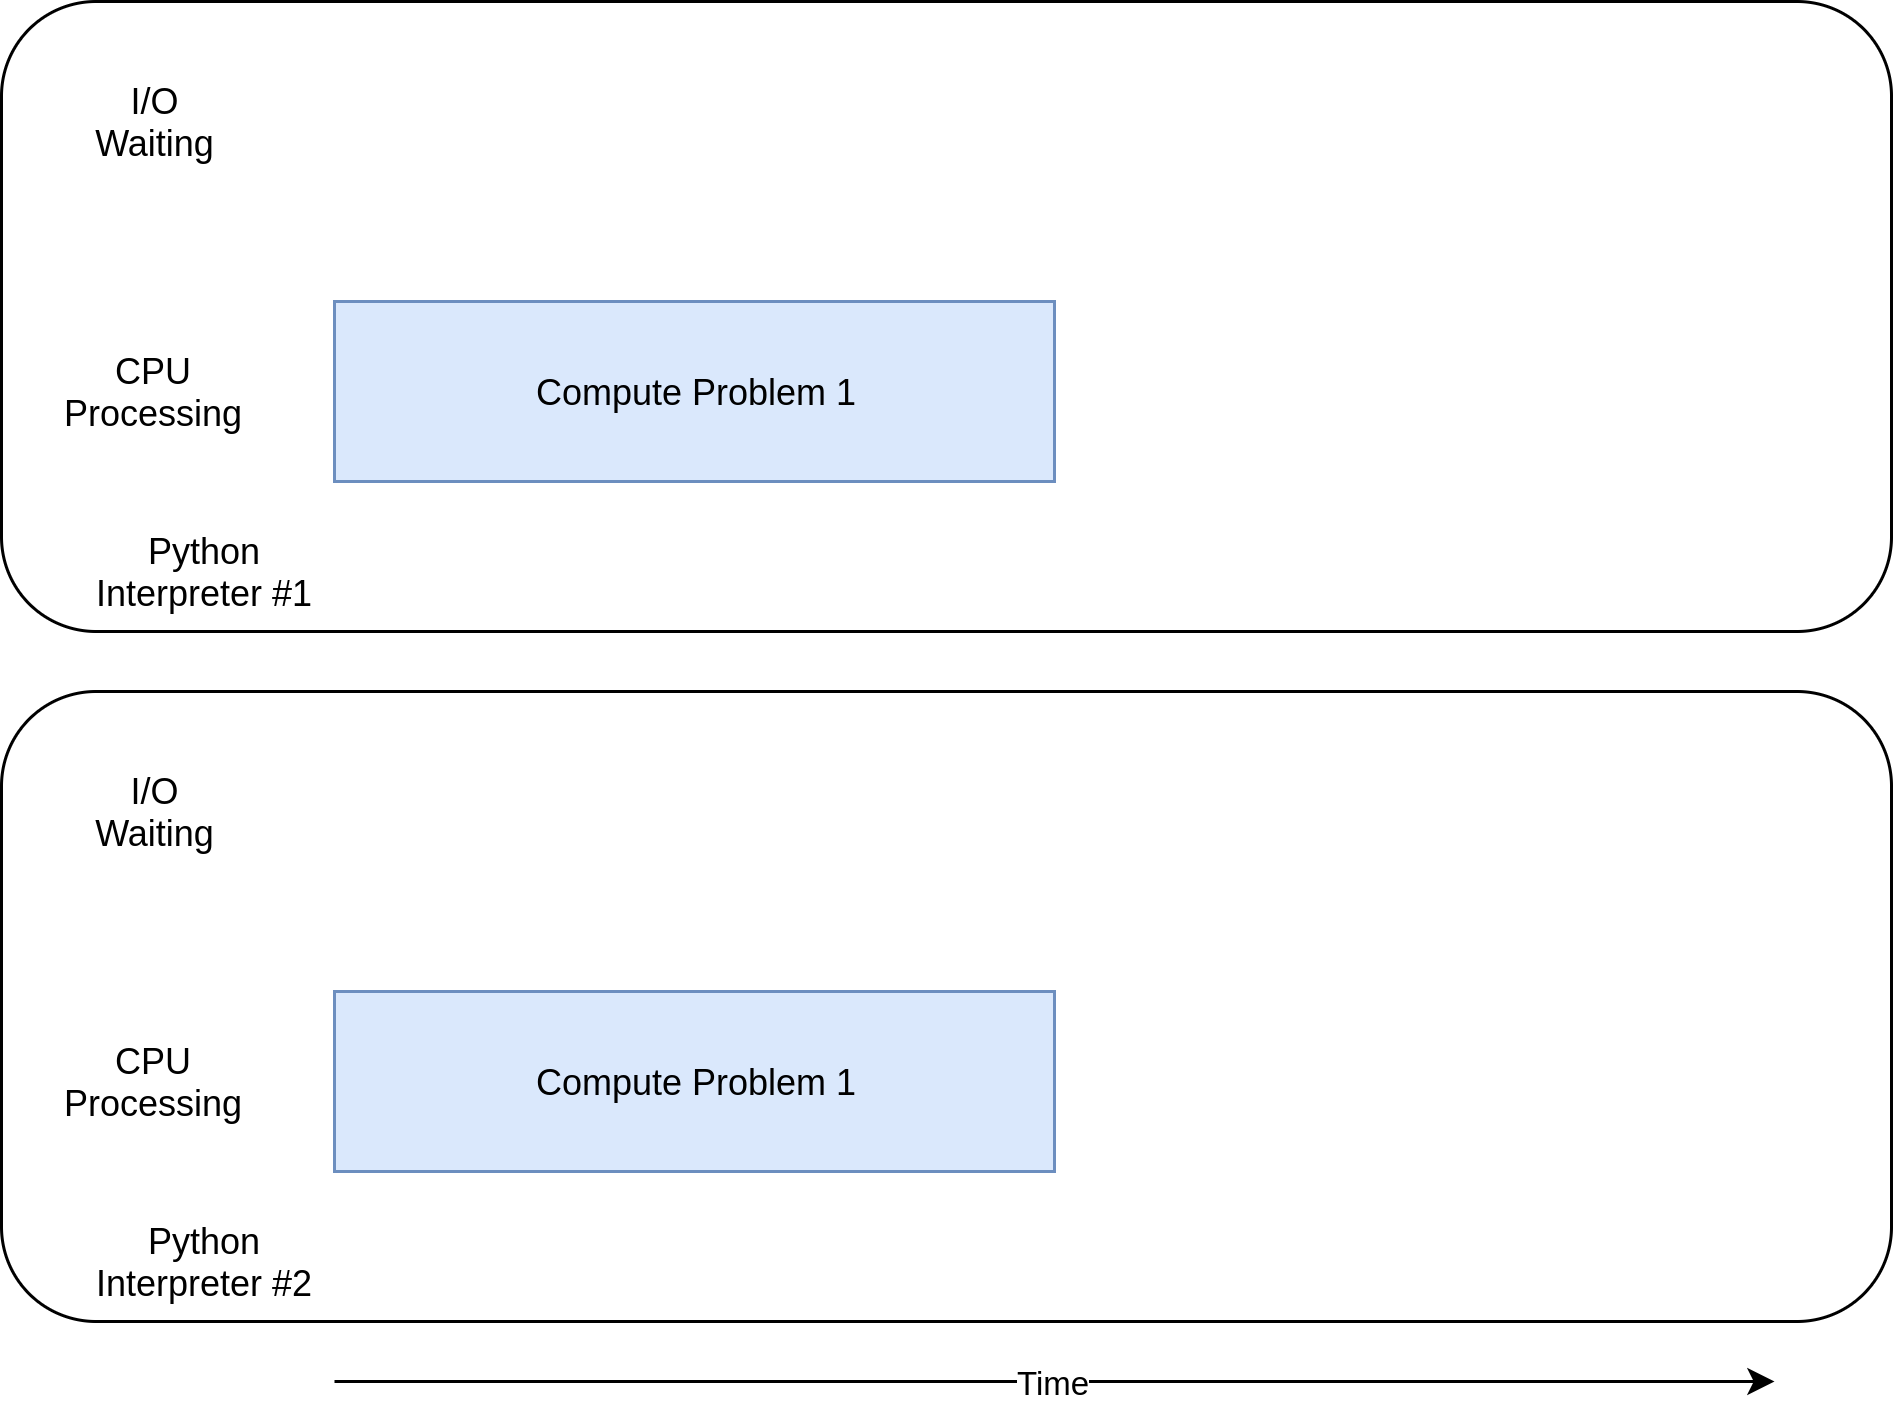

In [44]:
import multiprocessing
import time


def cpu_bound(number):
    return sum(i * i for i in range(number))


def find_sums(numbers):
    with multiprocessing.Pool() as pool:
        pool.map(cpu_bound, numbers)



numbers = [5_000_000 + x for x in range(20)]

start_time = time.time()
find_sums(numbers)
duration = time.time() - start_time
print(f"Duration {duration} seconds")

Duration 5.561142683029175 seconds


Plusem tego podejścia jest to, że pozwala ono przy stosunkowo małym nakładzie pracy znacząco podnieśc wydajność. 
Nie zawsze jednak da się problem rozbić tak by obliczenia mogły być wykonywane niezależnie na różnych procesoarch. 

To oczywiście ledwo zarysowana problematyka współbieżności. Powinna dać jednak pogląd na to jakie rozwiązania mogą być przydatne w jakich sytuacjach